Macierz twarzy: (4096, 100) (piksele, liczba obrazów)
Liczba eigenfaces (r) potrzebna do zachowania 90% energii: 87


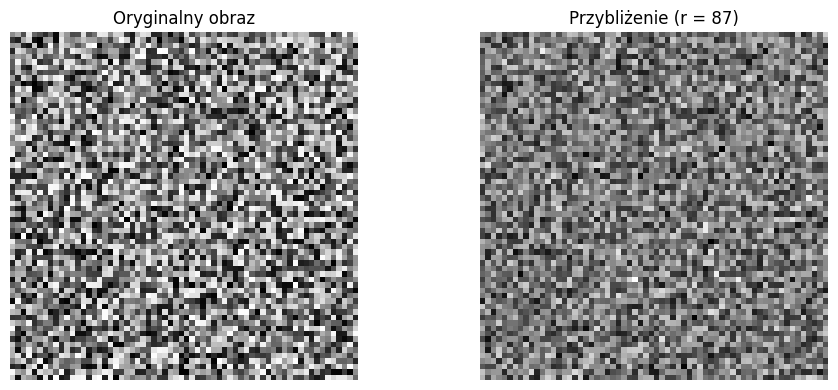

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

np.random.seed(0)
faces = np.random.rand(64*64, 100)


print(f"Macierz twarzy: {faces.shape} (piksele, liczba obrazów)")

mean_face = np.mean(faces, axis=1, keepdims=True)

X = faces - mean_face

U, S, VT = np.linalg.svd(X, full_matrices=False)

k_percent = 90

energy = np.cumsum(S**2) / np.sum(S**2)
r = np.searchsorted(energy, k_percent / 100) + 1
print(f"Liczba eigenfaces (r) potrzebna do zachowania {k_percent}% energii: {r}")

test_face = X[:, 0]
U_r = U[:, :r]
x_approx = U_r @ (U_r.T @ test_face) + mean_face.flatten()

h = w = int(np.sqrt(faces.shape[0]))
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(faces[:, 0].reshape(h, w), cmap='gray')
plt.title("Oryginalny obraz")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_approx.reshape(h, w), cmap='gray')
plt.title(f"Przybliżenie (r = {r})")
plt.axis('off')

plt.tight_layout()
plt.show()
